In [47]:
import sys
import numpy as np
from solver import vel_step, dens_step
import matplotlib.pyplot as plt
%cd src


[Errno 2] No such file or directory: 'src'
/src


In [48]:

# ますの数
N = 50
size = N + 2

dt = 0.1
# 拡散項
diff = 0
# 粘性係数
visc = 0.01
# 力の固定値
force = 50.0
source = 100.0
dvel = False

win_x = 512
win_y = 512

#tmp_pos_x,y から pos_x,y に移動するときにu,v を変更している
tmp_pos_x = 0.0
tmp_pos_y = 0.0
pos_x = 0.0
pos_y = 0.0
mouse_down = [False, False, False]

""" Start with two grids.
One that contains the density values from the previous time step and one that
will contain the new values. For each grid cell of the latter we trace the
cell's center position backwards through the velocity field. We then linearly
interpolate from the grid of previous density values and assign this value to
the current grid cell.
"""
#横速度
u = np.zeros((size, size), np.float64)  # velocity
u_prev = np.zeros((size, size), np.float64)
#縦速度
v = np.zeros((size, size), np.float64)  # velocity
v_prev = np.zeros((size, size), np.float64)
#密度
dens = np.zeros((size, size), np.float64)  # density
dens_prev = np.zeros((size, size), np.float64)

In [49]:
#指定された方向にフリックするプログラム

def clear_data():
    """clear_data."""

    global u, v, u_prev, v_prev, dens, dens_prev, size

    u[0:size, 0:size] = 0.0
    v[0:size, 0:size] = 0.0
    u_prev[0:size, 0:size] = 0.0
    v_prev[0:size, 0:size] = 0.0
    dens[0:size, 0:size] = 0.0
    dens_prev[0:size, 0:size] = 0.0


def move(d, u, v, prev_x, prev_y, x, y):
    """状況のアップデート"""

    # d,u,vの初期化
    d[0:size, 0:size] = 0.0
    u[0:size, 0:size] = 0.0
    v[0:size, 0:size] = 0.0

    dx = x - prev_x
    dy = y - prev_y

    #流入も移動もない場合，そもそも関数が呼ばれない

    # 更新する座標を選択
    if x < 1 or x > N or y < 1 or y > N:
        return

    move = True
    pour = True
    if move:
        u[x, y] = force * (dx)
        v[x, y] = force * (-dy)

    if pour:
        d[x, y] = source



In [50]:
def calc_init_vec(dx,dy,v=1):
    #長さ1の，xとyを求める
    if dx==0:
        return(0,2)

    tan = dy/dx
    rad = np.arctan2(dy,dx)
    ex = np.cos(rad) * v
    ey = np.sin(rad) * v
    
    return (ex,ey)



def main():
    route = [(1,1),(10,10),(30,2),(40,40)]
    l = len(route)
    #時間を固定
    timestep = 20
    cnt = 0
    for i in range(l-1):
        start_x,start_y = route[i]
        goal_x,goal_y = route[i + 1]
        dx = goal_x - start_x
        dy = goal_y - start_y
        route_len = np.sqrt((start_x - goal_x) ** 2 + (start_y - goal_y) ** 2)
        step_len = route_len / timestep
        step_vec = calc_init_vec(dx,dy,step_len)
        cur_x = start_x
        cur_y = start_y
        for j in range(timestep):
            cnt += 1
            new_x = cur_x + step_vec[0]
            new_y = cur_y + step_vec[1]
            move(dens, u_prev, v_prev,int(cur_x),int(cur_y),int(new_x),int(new_y)) 
            vel_step(N, u, v, u_prev, v_prev, visc, dt)
            dens_step(N, dens, dens_prev, u, v, diff, dt)
            cur_x = new_x
            cur_y = new_y
            #densの値を2倍
            display_dens = dens * 2
            #グレースケールとして扱い，表示
            plt.imshow(display_dens, cmap='gray')
            plt.savefig(f'res/dens{cnt:02d}.png')


        

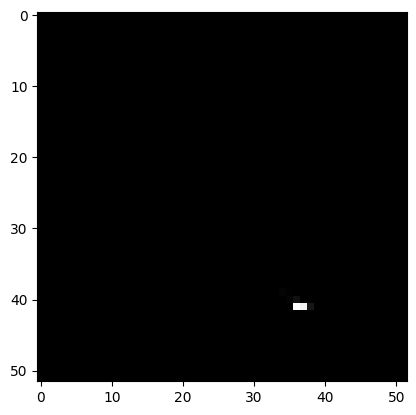

In [51]:


if __name__ == '__main__':
    clear_data()
    main()


In [52]:
#ffmpegで動画にする
%ffmpeg -r 10 -i dens%d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p out.mp4

UsageError: Line magic function `%ffmpeg` not found.
